<a href="https://colab.research.google.com/github/AhirtonLopes/Intro-to-Keras/blob/master/Demo_Keras_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Demo 2 - Operações básicas em DL via Keras (Base Fashion_MNIST)

Se você quiser digitar junto ...

Execute um Notebook Jupyter local ou:

Binder: Notebook Jupyter no Navegador

Colaboratory: "Google Docs para Notebooks Jupyter"

In [1]:
import keras
from keras.datasets import fashion_mnist
from matplotlib import pyplot
from random import randint
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
# Configurar nossos sets de treinamento e teste
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


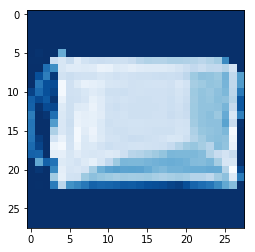

In [3]:
pyplot.imshow(x_train[randint(0, x_train.shape[0])], cmap='Blues_r'); #Testar com outros itens - só mudar o cmap - cmaps possíveis: #Testar com outros itens - só mudar o cmap - cmaps possíveis: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r e +

In [0]:
# Definindo nosso modelo de CNN

# Redefinindo as dimensões de entrada para garantir que a convolução funcione

img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [0]:
# Convertendo vetores de classes em matrizes de classe binária

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [7]:
# Definindo nosso modelo

model = Sequential()
model.add(Conv2D(32, 
         kernel_size=(3, 3),
         activation='relu',
         input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
# Definindo nosso treinamento

training = model.fit(x_train, 
                     y_train,
                     epochs=1,
                     verbose=True, 
                     validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 272s 5ms/step - loss: 14.4956 - acc: 0.1006 - val_loss: 14.5305 - val_acc: 0.0985


In [11]:
loss, accuracy = model.evaluate(x_test, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 8s 787us/step
Test loss: 14.5
Test accuracy: 10.000%
